__Importing required modules__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Match_data_unclean=pd.read_csv('Men T20I Team Match Results - 21st Century.csv')

**Top 5 rows**

In [4]:
Match_data_unclean.head()

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
0,Won,100 runs,England v Australia,Home,Southampton,2005/06/13,Jun,2005,Jun 2005,1,England
1,Lost,2 runs,England v Sri Lanka,Home,Southampton,2006/06/15,Jun,2006,Jun 2006,1,England
2,Lost,5 wickets,England v Pakistan,Home,Bristol,2006/08/28,Aug,2006,Aug 2006,1,England
3,Lost,77 runs,Australia v England,Away,Sydney,2007/01/09,Jan,2007,Jan 2007,1,England
4,Lost,15 runs,England v West Indies,Home,The Oval,2007/06/28,Jun,2007,Jun 2007,1,England


__Checking what values does the column Result contain?__

In [5]:
Match_data_unclean['Result'].unique()

array(['Won', 'Lost', 'Aban', 'N/R', 'Tied', 'Canc'], dtype=object)

__Cleaning the data by keeping only the rows with Won and Lost value and dropping the rows with other insignificant values__

In [6]:
Match_data=Match_data_unclean[Match_data_unclean['Result'].isin(['Won','Lost'])]

__Basic Information about the dataset__

In [7]:
Match_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1645
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Result        1521 non-null   object
 1   Margin        1521 non-null   object
 2   Match         1521 non-null   object
 3   Home/Away     1521 non-null   object
 4   Ground        1521 non-null   object
 5   Match Date    1521 non-null   object
 6   Match Month   1521 non-null   object
 7   Match Year    1521 non-null   int64 
 8   Match Period  1521 non-null   object
 9   Matches       1521 non-null   int64 
 10  Country       1521 non-null   object
dtypes: int64(2), object(9)
memory usage: 89.1+ KB


In [8]:
Match_data.describe()

,Match Year,Matches
count,1521.000000,1521.0
mean,2014.112426,1.0
std,3.889745,0.0
min,2005.000000,1.0
25%,2011.000000,1.0
50%,2014.000000,1.0
75%,2018.000000,1.0
max,2020.000000,1.0


__Names of participating countries__

In [9]:
Match_data['Country'].unique()

array(['England', 'Australia', 'South Africa', 'West Indies',
       'New Zealand', 'India', 'Pakistan', 'Sri Lanka', 'Zimbabwe',
       'Bermuda', 'Netherlands', 'Bangladesh', 'Kenya', 'Namibia',
       'Ireland', 'Scotland', 'Afghanistan'], dtype=object)

__Number of participating countries__

In [10]:
Match_data['Country'].nunique()

17

__Total number of matches played by each country__

In [17]:
Match_data.groupby('Country')['Match'].count()

Country
Afghanistan      80
Australia       120
Bangladesh       94
Bermuda          14
England         111
India           127
Ireland          89
Kenya            38
Namibia          16
Netherlands      71
New Zealand     120
Pakistan        147
Scotland         61
South Africa    119
Sri Lanka       124
West Indies     116
Zimbabwe         74
Name: Match, dtype: int64

__Descending order of the number of matches played by each country__

In [11]:
Match_data.groupby('Country')['Match'].count().sort_values(ascending=False)

Country
Pakistan        147
India           127
Sri Lanka       124
Australia       120
New Zealand     120
South Africa    119
West Indies     116
England         111
Bangladesh       94
Ireland          89
Afghanistan      80
Zimbabwe         74
Netherlands      71
Scotland         61
Kenya            38
Namibia          16
Bermuda          14
Name: Match, dtype: int64

_Above data shows that Pakistan has played maximum number of matches and Bermuda has played the minimum number of matches_

__We can plot this without the actual count with the help of countplot__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

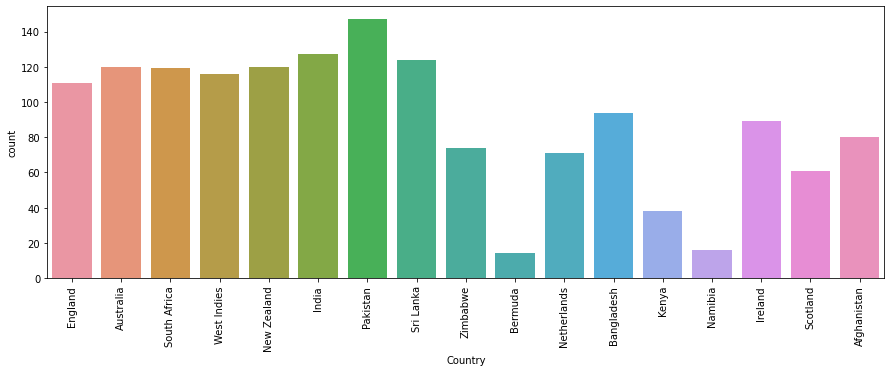

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(Match_data['Country'])
plt.xticks(rotation=90)

__Number of matches played on each ground__

In [13]:
Match_data.groupby('Ground')['Match'].count()

Ground
Aberdeen           4
Abu Dhabi         43
Adelaide          10
Ahmedabad          2
Al Amerat         17
                  ..
Tolerance Oval     3
Townsville         3
Visakhapatnam      4
Wellington        22
Windhoek           8
Name: Match, Length: 109, dtype: int64

__We can plot this information in the form of a histogram to see the distribution of the number of matches__

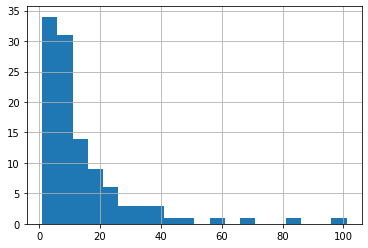

In [14]:
Match_data.groupby('Ground')['Match'].count().hist(bins=20)

_Above plot shows that most of the grounds have hosted count of matches between 1-20_

__Countries won statistics__

In [15]:
Countries_won_data=Match_data[Match_data['Result']=='Won'].groupby('Country').count().reset_index()[['Country','Result']]
Countries_won_data.rename(columns={'Result':'Won Count'},inplace=True)
Countries_won_data

,Country,Won Count
0,Afghanistan,55
1,Australia,67
2,Bangladesh,32
3,Bermuda,4
4,England,58
5,India,83
6,Ireland,41
7,Kenya,15
8,Namibia,12
9,Netherlands,39


__Countries lose stats__

In [16]:
Countries_lost_data=Match_data[Match_data['Result']=='Lost'].groupby('Country').count().reset_index()[['Country','Result']]
Countries_lost_data.rename(columns={'Result':'Lost count'},inplace=True)
Countries_lost_data

,Country,Lost count
0,Afghanistan,25
1,Australia,53
2,Bangladesh,62
3,Bermuda,10
4,England,53
5,India,44
6,Ireland,48
7,Kenya,23
8,Namibia,4
9,Netherlands,32


__Lets plot win and lose stats on the same graph keeping their axis different__

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

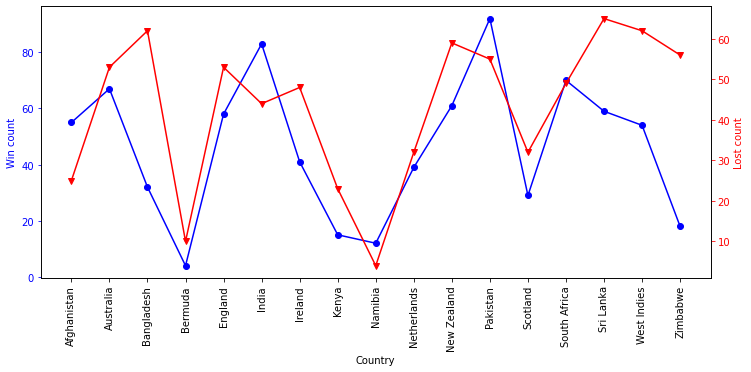

In [17]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Countries_won_data['Country'],Countries_won_data['Won Count'],color='b',marker='o')
ax.set_xlabel('Country')
ax.set_ylabel('Win count',color='b')
ax.tick_params('y',colors='b')
plt.xticks(rotation=90)
ax2=ax.twinx()
ax2.plot(Countries_lost_data['Country'],Countries_lost_data['Lost count'],color='r',marker='v')
ax2.set_xlabel('Country')
ax2.set_ylabel('Lost count',color='r')
ax2.tick_params('y',colors='r')
plt.xticks(rotation=90)

__Data of Year and number of matches__

In [31]:
Data2=Match_data.groupby(['Match Year'])['Match'].count().reset_index()
Data2

,Match Year,Match
0,2005,6
1,2006,16
2,2007,72
3,2008,46
4,2009,94
5,2010,128
6,2011,42
7,2012,148
8,2013,100
9,2014,109


__Plot of number of total number of matches played each year__

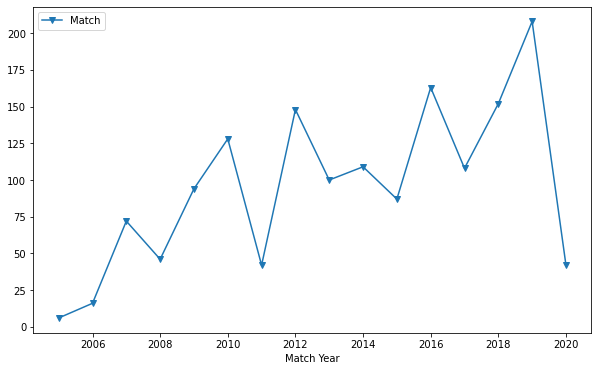

In [32]:
Data2.plot('Match Year','Match',marker='v',figsize=(10,6))

__Maximum number of matches are played in which year?__

In [33]:
Data2[Data2['Match'].max()==Data2['Match']]['Match Year']

14    2019
Name: Match Year, dtype: int64

__Match data for the year in which maximum number of matches were played__

In [34]:
Match_data[Match_data['Match Year']==2019]

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
107,Won,4 wickets,West Indies v England,Away,Gros Islet,2019/03/05,Mar,2019,Mar 2019,1,England
108,Won,137 runs,West Indies v England,Away,Basseterre,2019/03/08,Mar,2019,Mar 2019,1,England
109,Won,8 wickets,West Indies v England,Away,Basseterre,2019/03/10,Mar,2019,Mar 2019,1,England
110,Won,7 wickets,England v Pakistan,Home,Cardiff,2019/05/05,May,2019,May 2019,1,England
111,Won,7 wickets,New Zealand v England,Away,Christchurch,2019/11/01,Nov,2019,Nov 2019,1,England
...,...,...,...,...,...,...,...,...,...,...,...
1638,Lost,7 wickets,Afghanistan v Zimbabwe,Home,Chattogram,2019/09/20,Sep,2019,Sep 2019,1,Afghanistan
1639,Lost,4 wickets,Bangladesh v Afghanistan,Away,Chattogram,2019/09/21,Sep,2019,Sep 2019,1,Afghanistan
1641,Lost,30 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/14,Nov,2019,Nov 2019,1,Afghanistan
1642,Won,41 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/16,Nov,2019,Nov 2019,1,Afghanistan


In [35]:
Data_for_months_2019=Match_data[Match_data['Match Year']==2019].groupby(['Match Month','Country'])['Match'].count()

In [36]:
Data_for_months_2019

Match Month  Country     
Aug          Bermuda         5
             India           3
             Namibia         4
             Netherlands     4
             West Indies     3
                            ..
Sep          New Zealand     3
             Scotland        4
             South Africa    2
             Sri Lanka       3
             Zimbabwe        6
Name: Match, Length: 62, dtype: int64

In [37]:
data=Match_data[Match_data['Match Year']==2019].groupby(['Match Month'])['Result'].count()

In [38]:
Data1=pd.DataFrame(data)
Data1

,Result
Match Month,
Aug,19
Dec,6
Feb,31
Jan,2
Jul,4
Jun,2
Mar,10
May,8
Nov,32


__Sorting data month-wise__

In [39]:
category = ['Jan', 'Feb', 'Mar','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
Data1.index = pd.CategoricalIndex(Data1.index, categories=category, ordered=True)
Data1 = Data1.sort_index()
Data1

,Result
Match Month,
Jan,2
Feb,31
Mar,10
May,8
Jun,2
Jul,4
Aug,19
Sep,34
Oct,60


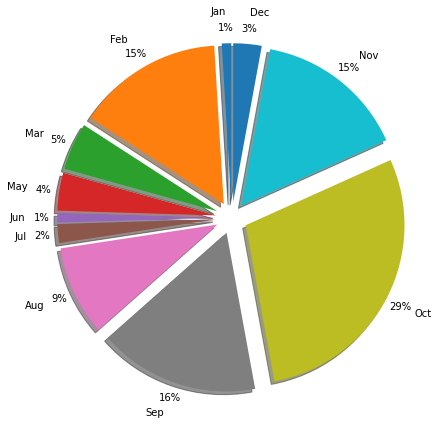

In [40]:
plt.figure(figsize=(15,6))
plt.pie(Data1['Result'],labels=category,explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        shadow=True, startangle=90,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.tight_layout()

_Most of the matches are played in the month of October_

__Number of matches played by each team at their home ground__

In [41]:
Stats=Match_data[['Country','Home/Away','Result']]
a1=Stats[Stats['Home/Away']=='Home'].groupby('Country').count().reset_index()
a1.rename(columns={'Home/Away':'Home Matches'},inplace=True)
a1.drop(columns=['Result'],inplace=True)
a1

,Country,Home Matches
0,Afghanistan,65
1,Australia,79
2,Bangladesh,58
3,Bermuda,13
4,England,64
5,India,65
6,Ireland,49
7,Kenya,23
8,Namibia,10
9,Netherlands,36


__Number of matches won at Home Ground__

In [42]:
Home_win_stats=Stats[(Stats['Result']=='Won') & (Stats['Home/Away']=='Home')].groupby('Country').count().reset_index()
Home_win_stats.rename(columns={'Home/Away':'Home','Result':'Home Win Count'},inplace=True)
Home_win_stats.drop(columns=['Home'],inplace=True)
Home_win_stats

,Country,Home Win Count
0,Afghanistan,45
1,Australia,44
2,Bangladesh,22
3,Bermuda,4
4,England,36
5,India,41
6,Ireland,25
7,Kenya,7
8,Namibia,7
9,Netherlands,17


__Number of matches lost at Home Ground__

In [43]:
Home_lost_stats=Stats[(Stats['Result']=='Lost') & (Stats['Home/Away']=='Home')].groupby('Country').count().reset_index()
Home_lost_stats.rename(columns={'Home/Away':'Home','Result':'Home Lost count'},inplace=True)
Home_lost_stats.drop(columns=['Home'],inplace=True)
Home_lost_stats

,Country,Home Lost count
0,Afghanistan,20
1,Australia,35
2,Bangladesh,36
3,Bermuda,9
4,England,28
5,India,24
6,Ireland,24
7,Kenya,16
8,Namibia,3
9,Netherlands,19


__Number of matches played at away ground/ Not played at the home ground__

In [44]:
a2=Stats[Stats['Home/Away']=='Away'].groupby('Country').count().reset_index()
a2.rename(columns={'Home/Away':'Away Matches'},inplace=True)
a2.drop(columns=['Result'],inplace=True)
a2

,Country,Away Matches
0,Afghanistan,15
1,Australia,41
2,Bangladesh,36
3,Bermuda,1
4,England,47
5,India,62
6,Ireland,40
7,Kenya,15
8,Namibia,6
9,Netherlands,35


__Accumulated data of matches played and matches won and lost__

In [45]:
new=Match_data.groupby('Country')['Match'].count().reset_index()
new.rename(columns={'Match':'Total Matches'},inplace=True)
Win_lose_stats=pd.concat([Home_win_stats['Country'],new['Total Matches'],a2['Away Matches'],a1['Home Matches'],Home_win_stats['Home Win Count'],Home_lost_stats['Home Lost count']],axis=1)
Win_lose_stats

,Country,Total Matches,Away Matches,Home Matches,Home Win Count,Home Lost count
0,Afghanistan,80,15,65,45,20
1,Australia,120,41,79,44,35
2,Bangladesh,94,36,58,22,36
3,Bermuda,14,1,13,4,9
4,England,111,47,64,36,28
5,India,127,62,65,41,24
6,Ireland,89,40,49,25,24
7,Kenya,38,15,23,7,16
8,Namibia,16,6,10,7,3
9,Netherlands,71,35,36,17,19


__Correlation between winning and losing stats__

In [34]:
Win_lose_stats.corr()

,Total Matches,Away Matches,Home Matches,Home Win Count,Home Lost count
Total Matches,1.000000,0.824501,0.750387,0.721567,0.627861
Away Matches,0.824501,1.000000,0.244661,0.254492,0.177025
Home Matches,0.750387,0.244661,1.000000,0.939133,0.869058
Home Win Count,0.721567,0.254492,0.939133,1.000000,0.646201
Home Lost count,0.627861,0.177025,0.869058,0.646201,1.000000


__Heatmap of above correlation__

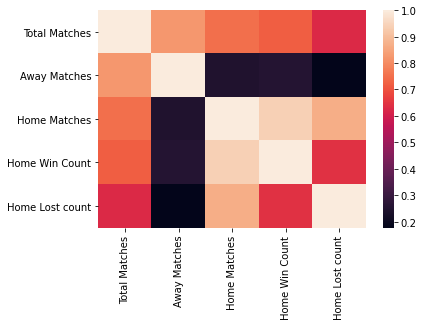

In [35]:
sns.heatmap(Win_lose_stats.corr())

_Each square shows the correlation between the variables on each axis. In our heatmap, correlation ranges from 0.2 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases._